In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.special import gamma

from imripy import halo, constants as c, merger_system as ms, inspiral, waveform, detector, plot_utils as pu, kepler
from imripy.inspiral import forces

import plot_utils

## Dyanmical Friction with and without DM phase space

### Compare to https://arxiv.org/pdf/1908.10241.pdf

In [2]:
m1 = 1e3 * c.solar_mass_to_pc
m2 = 10  * c.solar_mass_to_pc

# The luminosity distance to the system
D = 5e8  # in pc

hs = ms.HostSystem(m1, D_l=D)

In [3]:
rho_spike = 226 * c.solar_mass_to_pc
r_spike = 0.54

spike_1 = halo.Spike(rho_spike, r_spike, 1.5, m1)
spike_2 = halo.Spike(rho_spike, r_spike, 2., m1)
spike_3 = halo.Spike(rho_spike, r_spike, 7./3., m1)

In [4]:
def compareModels(hs, spike, a0, e0, lnLambda1, lnLambda2, ax_ea, label="", acc=1e-10, verbose=1, color=None):
    afin = hs.r_isco
  
    opt = inspiral.Classic.EvolutionOptions(dissipativeForces=[forces.GWLoss(), forces.DynamicalFriction(halo=spike,haloPhaseSpaceDescription=False, ln_Lambda=lnLambda1)],
                                                      verbose=verbose, accuracy=acc)
    ko = kepler.KeplerOrbit(hs, m2, a0, e0)
    ev_stat = inspiral.Classic.Evolve(hs, ko, a_fin=afin, opt=opt)
    l, = ax_ea.plot( ev_stat.a*(1.-ev_stat.e**2)/hs.m1, ev_stat.e, label=label+r", stat", linestyle='-.', alpha=0.6, color=color)
    
    opt=inspiral.Classic.EvolutionOptions(dissipativeForces=[forces.GWLoss(), forces.DynamicalFriction(halo=spike, haloPhaseSpaceDescription=True, ln_Lambda=lnLambda2,  includeHigherVelocities=False)],
                                              verbose=verbose, accuracy=acc)
    ev_dyn = inspiral.Classic.Evolve(hs, ko, a_fin=afin, opt=opt)
    ax_ea.plot(ev_dyn.a*(1.-ev_dyn.e**2)/hs.m1, ev_dyn.e, color=l.get_c(), label=label+r", psd")

Evolving from  915.7509157509156  to  1.0 r_isco  with initial eccentricity 0.3  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 1.7944s real time
Evolving from  915.7509157509156  to  1.0 r_isco  with initial eccentricity 0.3  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 18.7522s real time
Evolving from  915.7509157509156  to  1.0 r_isco  with initial eccentricity 0.3  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 2.0736s real time
Evolving from  915.7509157509156  to  1.0 r_isco  with initial eccentricity 0.3  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occu

/media/data/Documents/PhD/imripy/src/imripy/kepler.py:240: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(self.m_tot *(2./r - 1./self.a))
/media/data/Documents/PhD/imripy/src/imripy/halo/dm.py:147: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:241: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:370: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * ko.m_red**2 * ko.m_tot**(5./2.) / ko.a**(7./2.)  / (1. - ko.e**2)**2 * (1. + 7./8.*ko.e**2)
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:264: RuntimeWarnin

A termination event occurred.
 -> Ended at 2.669e+00r_isco. Evolution took 2.1549s real time
Evolving from  915.7509157509156  to  1.0 r_isco  with initial eccentricity 0.3  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 13.3883s real time
Evolving from  1302.0833333333333  to  1.0 r_isco  with initial eccentricity 0.6  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 2.6508s real time
Evolving from  1302.0833333333333  to  1.0 r_isco  with initial eccentricity 0.6  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 19.4004s real time
Evolving from  1302.0833333333333  to  1.0 r_isco  with initial eccentricity 0.6  with  Options: dissi

/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:353: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * ko.m_red**2 * ko.m_tot**3 / ko.a**5  / (1. - ko.e**2)**(7./2.) * (1. + 73./24. * ko.e**2 + 37./96. * ko.e**4)
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:241: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:264: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi *np.sqrt(ko.m_tot * a*(1.-e**2))* quad(integrand, 0., 2.*np.pi, limit = 100)[0]


A termination event occurred.
 -> Ended at 2.683e+00r_isco. Evolution took 3.5389s real time
Evolving from  1302.0833333333333  to  1.0 r_isco  with initial eccentricity 0.6  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 16.8322s real time


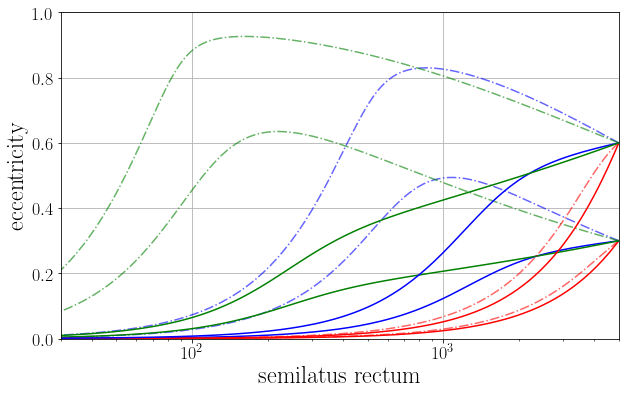

In [5]:
fig = plt.figure(figsize=(10,6)); ax_ea = fig.gca()
p0 = 5000 * m1
e0 = 0.3
a0 = p0 /(1-e0**2) 
compareModels(hs, spike_1, a0, e0, 10., -1, ax_ea, color='red', label=r"$\alpha_\text{spike}=1.5$")
compareModels(hs, spike_2, a0, e0, 10., -1, ax_ea, color='blue', label=r"$\alpha_\text{spike}=2$")
compareModels(hs, spike_3, a0, e0, 10., -1, ax_ea, color='green', label=r"$\alpha_\text{spike}=7/3$")

e0 = 0.6
a0 = p0 /(1-e0**2) 
compareModels(hs, spike_1, a0, e0, 10., -1, ax_ea, color='red', label=r"$\alpha_\text{spike}=1.5$")
compareModels(hs, spike_2, a0, e0, 10., -1, ax_ea, color='blue', label=r"$\alpha_\text{spike}=2$")
compareModels(hs, spike_3, a0, e0, 10., -1, ax_ea, color='green', label=r"$\alpha_\text{spike}=7/3$")
                 
                 
ax_ea.set_xscale('log')
ax_ea.set_xlim(left=3e1, right=p0/m1); 
ax_ea.set_ylim(bottom=0., top=1.)
ax_ea.set_xlabel("semilatus rectum")
ax_ea.set_ylabel("eccentricity")
ax_ea.grid()
#fig.savefig("plots/xiEffects_pe.pdf")

### Compare dephasing effects

In [6]:
def compareN2(hs, k0, spike, lnLambda, ax_dN2, label="", acc=1e-10, verbose=1, color=None):

    opt_0=inspiral.Classic.EvolutionOptions(dissipativeForces=[forces.GWLoss()], verbose=verbose, accuracy=acc)
    ev_0 = inspiral.Classic.Evolve(hs, k0, opt=opt_0)
    f_gw_0, N2_0 = waveform.N_cycles_n(2, hs, ev_0)
    N2_0_interp = interp1d(f_gw_0, N2_0, kind='cubic', bounds_error=False, fill_value=(0.,0.))
    
    df_stat = forces.DynamicalFriction(halo=spike, haloPhaseSpaceDescription=False, ln_Lambda=lnLambda)
    opt_stat=inspiral.Classic.EvolutionOptions(dissipativeForces=[forces.GWLoss(), df_stat], verbose=verbose, accuracy=acc)
    ev_stat = inspiral.Classic.Evolve(hs, k0, opt=opt_stat)
    f_gw_stat, N2_stat = waveform.N_cycles_n(2, hs, ev_stat)
    N2_stat_interp = interp1d(f_gw_stat, N2_stat, kind='cubic', bounds_error=False, fill_value=(0.,0.))
    
    df_dyn = forces.DynamicalFriction(halo=spike, haloPhaseSpaceDescription=True, ln_Lambda=lnLambda,  includeHigherVelocities=False)
    opt_dyn=inspiral.Classic.EvolutionOptions(dissipativeForces=[forces.GWLoss(), df_dyn], verbose=verbose, accuracy=acc)
    ev_dyn = inspiral.Classic.Evolve(hs, k0, opt=opt_dyn)
    f_gw_dyn, N2_dyn = waveform.N_cycles_n(2, hs, ev_dyn)

    dN2_stat =  np.abs(N2_stat - N2_0_interp(f_gw_stat))
    dN2_stat_interp = interp1d(f_gw_stat, dN2_stat, kind='cubic', bounds_error=False, fill_value=(0.,0.))
    dN2_dyn = np.abs(N2_dyn - N2_0_interp(f_gw_dyn))
    
    #l, = ax_dN2.loglog(f_gw_stat/ms.hz_to_invpc, dN2_stat, label=r"$|\Delta N^{(2)}_{stat}|$" + label)
    #ax_dN2.loglog(f_gw_dyn/ms.hz_to_invpc, dN2_dyn, 
    #                      color = l.get_c(), linestyle='--', label=r"$|\Delta N^{(2)}_{dyn}|$" + label)

    ax_dN2.plot(f_gw_dyn/c.hz_to_invpc, dN2_dyn/dN2_stat_interp(f_gw_dyn), 
                           label= label)

In [7]:
m1 = 1e3 * c.solar_mass_to_pc
m2 = 1  * c.solar_mass_to_pc

D = 5e8  # in pc
hs = ms.HostSystem(m1, D_l=D)


rho_spike = 226 * c.solar_mass_to_pc
r_spike = 0.54
alpha = 7/3
spike = halo.Spike(rho_spike, r_spike, alpha, m1)

Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 0.0521s real time
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 1.0352s real time
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 12.3840s real time
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.2  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 0.0544s real time
Evolving

<ipython-input-6-6b04a9b21574>:27: RuntimeWarning: divide by zero encountered in divide
  ax_dN2.plot(f_gw_dyn/c.hz_to_invpc, dN2_dyn/dN2_stat_interp(f_gw_dyn),


A termination event occurred.
 -> Ended at 2.671e+00r_isco. Evolution took 2.3260s real time
Evolving from  200.0  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.668e+00r_isco. Evolution took 24.2699s real time


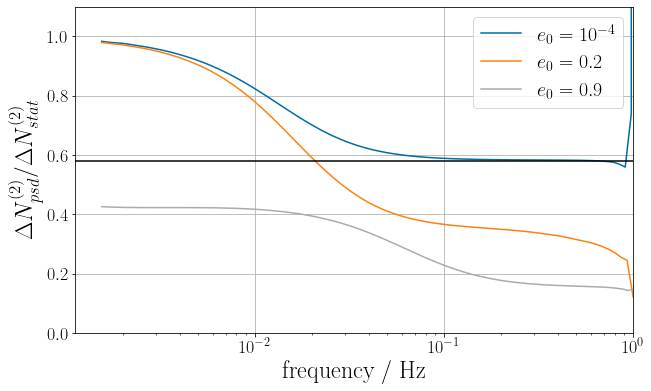

In [8]:
fig = plt.figure(figsize=(10,6)); ax_dN2 = fig.gca()
a0 = 200 * hs.r_isco
k0 = kepler.KeplerOrbit(hs, m2, a0)

k0.e = 1e-4
compareN2(hs, k0, spike, -1, ax_dN2, label=r"$e_0=10^{-4}$")

k0.e = 0.2
compareN2(hs, k0, spike, -1, ax_dN2, label=r"$e_0=0.2$")

k0.e = 0.9
compareN2(hs, k0, spike, -1, ax_dN2, label=r"$e_0=0.9$")

plt.grid(); 
plt.xscale('log'); plt.ylim(bottom = 0., top=1.1)
plt.xlim(right=1)
plt.xlabel("frequency / Hz")
plt.ylabel("$\Delta N^{(2)}_{psd}/\Delta N^{(2)}_{stat}$")
plt.axhline(0.58, color='black')
plt.legend(loc='upper right')
#fig.savefig("plots/xi_dephasing.pdf")

## GWsignal effects

In [9]:
# The masses of the primary and secondary object
m1 = 1e3 * c.solar_mass_to_pc
m2 = 1. * c.solar_mass_to_pc

# The luminosity distance to the system
D = 1e8  # in pc


hs = ms.HostSystem(m1, D_l=D)

# The dark matter spike according to https://arxiv.org/pdf/2108.04154.pdf
rho6 = 5.448e15 * c.solar_mass_to_pc  # in 1/pc^2 
alphas = [(7./3., r'$\alpha_{spike}=7/3$'), (9./4., r'$\alpha_{spike}=9/4$'), (7./4., r'$\alpha_{spike}=7/4$')]
spikes = [halo.Spike.FromRho6(rho6, m1, alpha) for alpha, label in alphas]

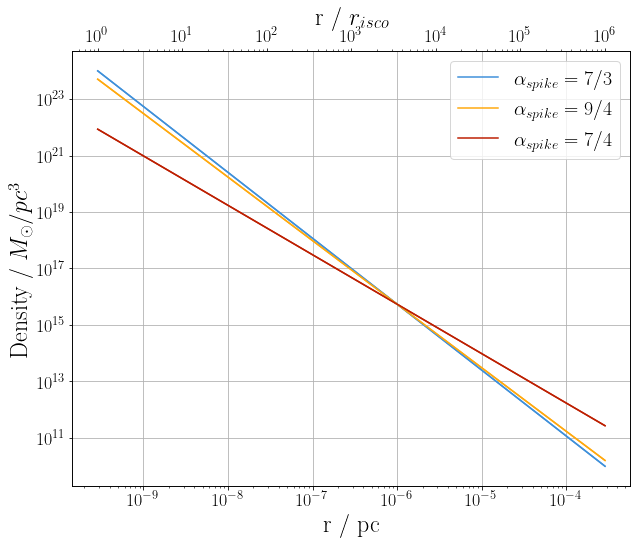

In [10]:
# Plots for comparison
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2"])
plt.figure(figsize=(10, 8))
ax_pc = plt.gca()
ax_risco = ax_pc.twiny()
r_grid = np.geomspace(hs.r_isco, 1e6*hs.r_isco)
for i, sp in enumerate(spikes):
    l, = ax_pc.loglog(r_grid, sp.density(r_grid)/c.solar_mass_to_pc, label=alphas[i][1])
    ax_risco.loglog(r_grid/hs.r_isco, sp.density(r_grid)/c.solar_mass_to_pc, color=l.get_c())

ax_pc.set_xlabel("r / pc"); ax_risco.set_xlabel("r / $r_{isco}$"); ax_pc.set_ylabel(r"Density / $M_\odot/pc^3$")
ax_pc.legend(); ax_pc.grid()
#plt.savefig("plots/rho_dm.pdf")

In [11]:
def compareModels(hs, spikes, k0, ax_a=None, ax_e=None, ax_ae=None, ax_h=None, ax_dN2=None, ax_m=None, ax_n=None,
                               label="", acc=1e-10, verbose=1, fgw5year_line=False):  

    # no dm
    opt_0=inspiral.Classic.EvolutionOptions(dissipativeForces=[forces.GWLoss()], verbose=verbose, accuracy=acc)
    ev_0 =  inspiral.Classic.Evolve(hs, k0, opt=opt_0)
    pu.plotEvolution(hs, ev_0, ax_a=ax_a, ax_e=ax_e, ax_ae=ax_ae, ax_n=ax_n, label=label + r'\text{vacuum}')
    if not ax_h is None:
        pu.plotGWcharacteristicStrain(hs, ev_0, ax_h, label=label+ r'\text{vacuum}' , harmonics=[2])
    fgw_0, N2_0 = waveform.N_cycles_n(2, hs, ev_0)
    N2_0interp = interp1d(fgw_0, N2_0, kind='cubic', bounds_error=False, fill_value=(0.,0.))
    if fgw5year_line:
        f_gw5yr = interp1d(ev_0.t, fgw_0, kind='cubic', bounds_error=True)(ev_0.t[-1] - 5.*c.year_to_pc)
        ax_dN2.axvline(f_gw5yr/c.hz_to_invpc, linestyle='--')
    
    t_fin = ev_0.t[-1] *  10**(-2.*(np.log10(a0/hs.r_isco) - 2.)) 
    
    for spike,label_dm in spikes:
        df = forces.DynamicalFriction(halo=spike, haloPhaseSpaceDescription=True, includeHigherVelocities=False)
        opt_dm=inspiral.Classic.EvolutionOptions(dissipativeForces=[forces.GWLoss(), df], verbose=verbose, accuracy=acc)
        ev_dm = inspiral.Classic.Evolve(hs, k0, t_fin=t_fin, opt=opt_dm)
        l_dm = pu.plotEvolution(hs, ev_dm, ax_a=ax_a, ax_e=ax_e, ax_ae=ax_ae, ax_n=ax_n, label=label + label_dm)

        # Plot the characteristic strain of the second harmonic
        if not ax_h is None:
            pu.plotGWcharacteristicStrain(hs, ev_dm, ax_h, harmonics=[2,3])

        # Calculate Delta N for the second harmonic
        if not ax_dN2 is None:
            pu.plotDeltaN(hs, ev_0, ev_dm, ax_dN2, label=r"$\Delta N^{(2)}$,"+label_dm, color=(l_dm.get_c() if not l_dm is None else None))

    

In [12]:
def preparePlots( figF, axesF, axes_ae=None, ax_m=None, axes_a=None, e_min=1e-5, f_min=8e-4):
    figF.subplots_adjust(hspace=0, wspace=0)
    
    if not axes_ae is None:
        for ax in axes_ae:
            ax.set_xlabel('semimajor axis / $r_{isco}$')
            ax.grid()
        axes_ae[0].set_ylabel('eccentricity')
        if axes_a is None:
            axes_ae[-1].legend(loc='upper left', bbox_to_anchor=(0.9, 1.))
        #axes_ae[0].set_ylim(bottom=e_min, top =1.)
    #if np.shape(axesT)[0] > 2:
    #    axesT[2,0].set_ylabel(r'$\Delta m_2/m_2$')
    #    axesT[2,0].set_ylim(bottom=1e-4)
    
    if not axes_a is None:
        for ax in axes_a:
            ax.set_xlabel('time / yr')
            ax.grid()
        axes_a[0].set_ylabel('semimajor axis / $r_{isco}$')
        axes_a[-1].legend(loc='upper left', bbox_to_anchor=(0.9, 1.))
    
    axesF[0,0].set_ylabel('characteristic strain')
    axesF[1,0].set_ylabel(r'$|\Delta N^{(2)}|$')
    f_gw = np.geomspace(detector.Lisa().Bandwith()[0], detector.Lisa().Bandwith()[1], 100)
    for ax in axesF[0,:]:
        ax.loglog(f_gw/c.hz_to_invpc, detector.Lisa().NoiseStrain(f_gw), label='LISA')
    for ax in axesF[1,:]:
        ax.set_xlabel('frequency / Hz')
    axesF[0,0].set_ylim(bottom=1e-23)
    from matplotlib.lines import Line2D
    explanatory_lines = [mpl.lines.Line2D([0], [0], color='black', linestyle='-'), 
                          mpl.lines.Line2D([0], [0], color='black', linestyle='--'),
                          mpl.lines.Line2D([0], [0], color="#832db6")]

    axesF[0,-1].legend(explanatory_lines, ["$h^{(2)}_{c,+}$", "$h^{(3)}_{c,+}$", "LISA"],
                           loc='upper left', bbox_to_anchor=(0.9, 1.))
    if axes_a is None and axes_ae is None:
        axesF[1,-1].legend(loc='upper left', bbox_to_anchor=(0.9, 1.))
    axesF[-1,0].set_ylim(bottom=1., top=1e8)
    axesF[-1,0].set_xlim(left=f_min)

    for ax in axesF.flatten():
        ax.grid()

Evolving from  300.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 0.0542s real time


/media/data/Documents/PhD/imripy/src/imripy/waveform.py:142: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  mean_anomaly = 2.*np.pi*  np.cumsum([quad(F_interp, ev.t[i-1], ev.t[i], epsabs=acc, epsrel=acc, limit=200)[0] if i > 0 else 0. for i in range(len(ev.t))])


Evolving from  300.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 12.4112s real time
Evolving from  300.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 12.2024s real time
Evolving from  300.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 14.6228s real time


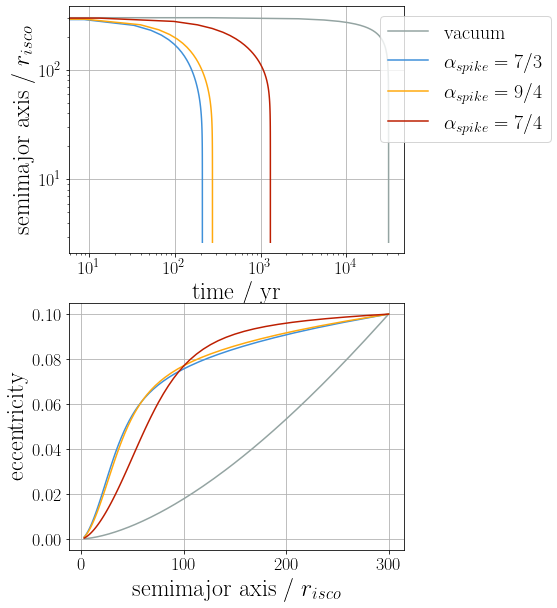

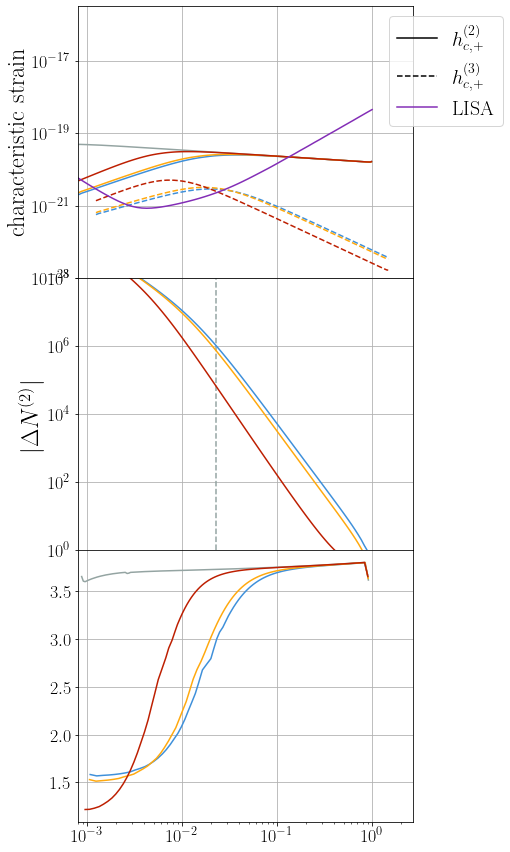

In [13]:
# An example case
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#94a4a2", "#3f90da", "#ffa90e", "#bd1f01", "#832db6"])
figT, axes_ae = plt.subplots(2, 1, figsize=(6,10))
figF, axes_gw = plt.subplots(3, 1, sharex='col', figsize=(6,15))

# Set initial conditions for orbital evolution
a0 = 300 * hs.r_isco
e0 = 0.1
k0 = kepler.KeplerOrbit(hs, m2, a0, e0)

spikes_and_labels = [(spike, alphas[i][1]) for i, spike in enumerate(spikes)]
compareModels(hs, spikes_and_labels, k0, ax_a=axes_ae[0], 
                           ax_ae=axes_ae[1], ax_h=axes_gw[0], ax_dN2=axes_gw[1], ax_n=axes_gw[2], fgw5year_line=True)

preparePlots(figF, np.array([[axes_gw[0]], [axes_gw[1]]]), axes_ae=[axes_ae[1]], axes_a=[axes_ae[0]])
axes_gw[2].grid()
#figT.savefig("plots/evolution_example.pdf", bbox_inches="tight"); figF.savefig("plots/gwSignal_example.pdf", bbox_inches="tight")

Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 0.0495s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 11.3467s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 12.2748s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.0001  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 14.

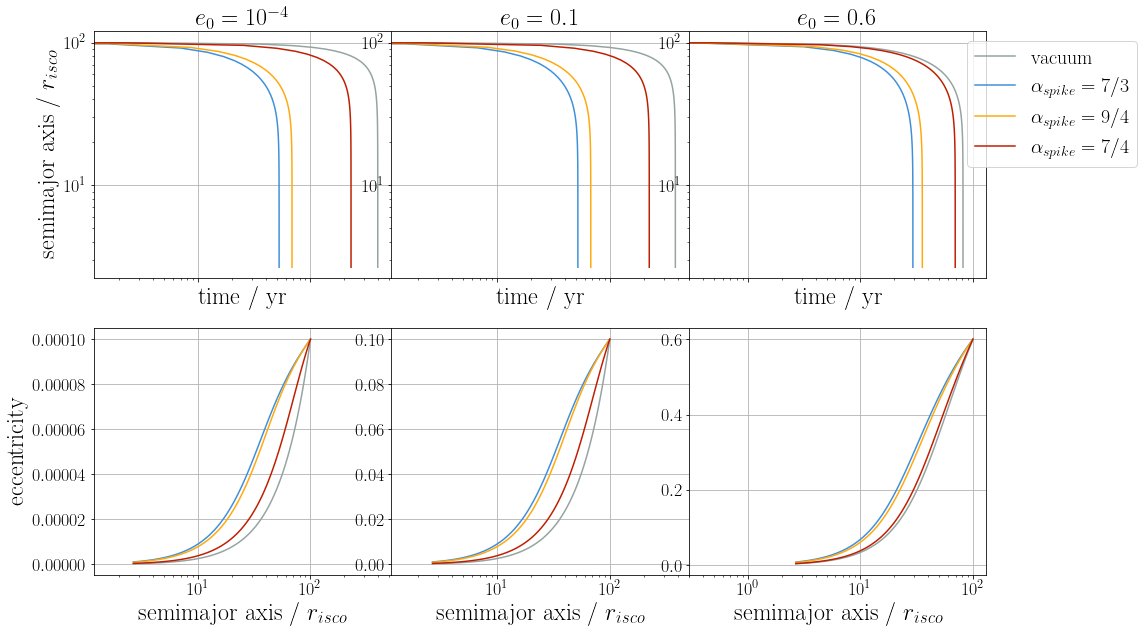

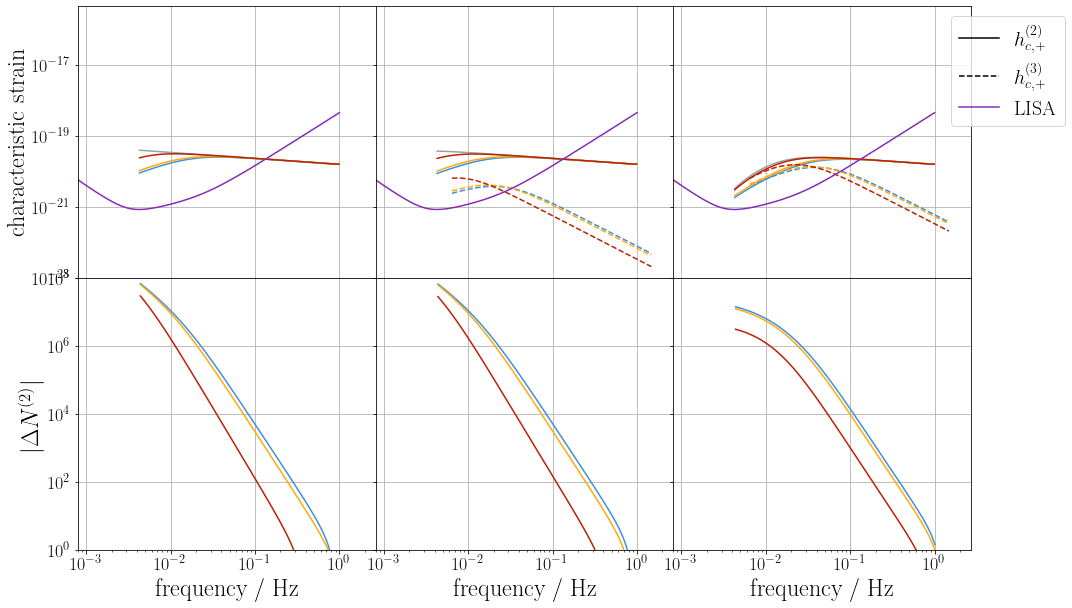

In [14]:
# Look at different initial eccentricities
figT, axesT = plt.subplots(2, 3, figsize=(16, 10), sharex='col')
figF, axesF = plt.subplots(2, 3, figsize=(16,10), sharex='all', sharey='row')
# Set initial conditions for orbital evolution
a0 = 100 * hs.r_isco
k0 = kepler.KeplerOrbit(hs, m2, a0)

k0.e = 1e-4
axesT[0,0].set_title(r"$e_0=10^{-4}$");# axesF[0,0].set_title(r"$e_0=10^{-4}$")
compareModels(hs, spikes_and_labels, k0, ax_a=axesT[0,0], ax_ae=axesT[1,0], ax_h=axesF[0,0], ax_dN2=axesF[1,0])

k0.e = 1e-1
axesT[0,1].set_title(r"$e_0=0.1$");# axesF[0,1].set_title(r"$e_0=0.1$")
compareModels(hs, spikes_and_labels, k0, ax_a=axesT[0,1], ax_ae=axesT[1,1], ax_h=axesF[0,1], ax_dN2=axesF[1,1])

k0.e = 0.6
axesT[0,2].set_title(r"$e_0=0.6$"); #axesF[0,2].set_title(r"$e_0=0.6$")
compareModels(hs, spikes_and_labels, k0, ax_a=axesT[0,2], ax_ae=axesT[1,2], ax_h=axesF[0,2], ax_dN2=axesF[1,2])

preparePlots( figF, axesF, axes_ae = axesT[1,:], axes_a=axesT[0,:])
figT.subplots_adjust(wspace=0)
axesT[0,0].set_yscale('log')
#figT.savefig("plots/evolution_e0.pdf", bbox_inches="tight"); figF.savefig("plots/gwSignal_e0.pdf", bbox_inches="tight")

Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 0.0490s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 12.0046s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 13.1148s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 14.8762s real t

/media/data/Documents/PhD/imripy/src/imripy/waveform.py:142: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  mean_anomaly = 2.*np.pi*  np.cumsum([quad(F_interp, ev.t[i-1], ev.t[i], epsabs=acc, epsrel=acc, limit=200)[0] if i > 0 else 0. for i in range(len(ev.t))])


Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 16.1833s real time
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 16.1568s real time
Evolving from  1000.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-11
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 18.7692s real time
Evolving from  10000.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.696e+00r_isco. Evolution took 0.0728s r

/media/data/Documents/PhD/imripy/src/imripy/waveform.py:142: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  mean_anomaly = 2.*np.pi*  np.cumsum([quad(F_interp, ev.t[i-1], ev.t[i], epsabs=acc, epsrel=acc, limit=200)[0] if i > 0 else 0. for i in range(len(ev.t))])


Evolving from  10000.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.673e+00r_isco. Evolution took 12.6166s real time
Evolving from  10000.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.654e+00r_isco. Evolution took 12.7055s real time
Evolving from  10000.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.665e+00r_isco. Evolution took 14.2823s real time


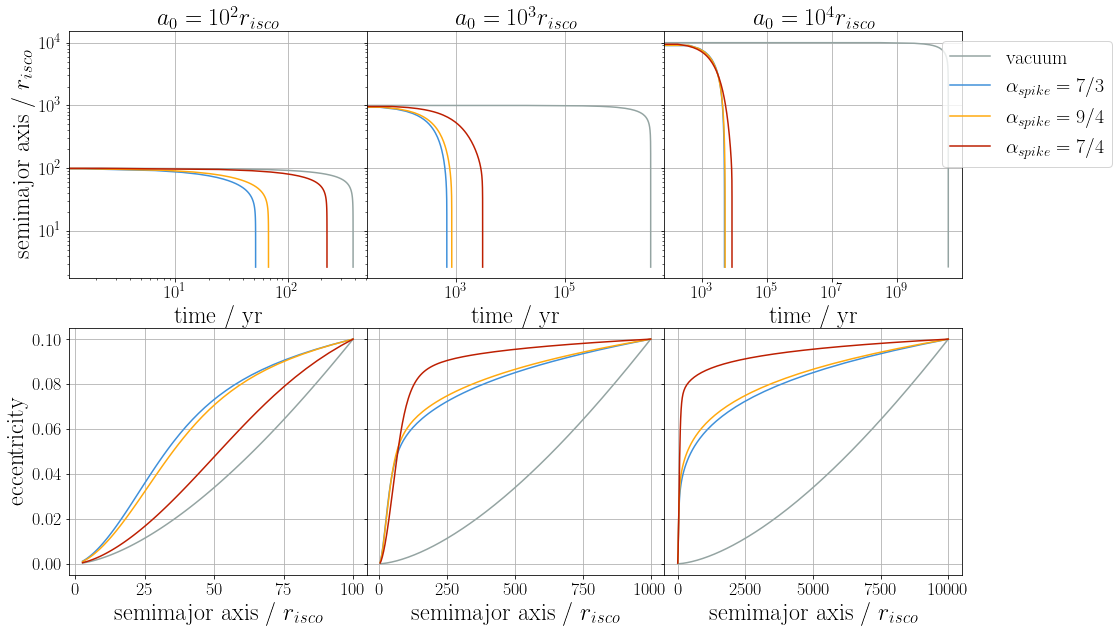

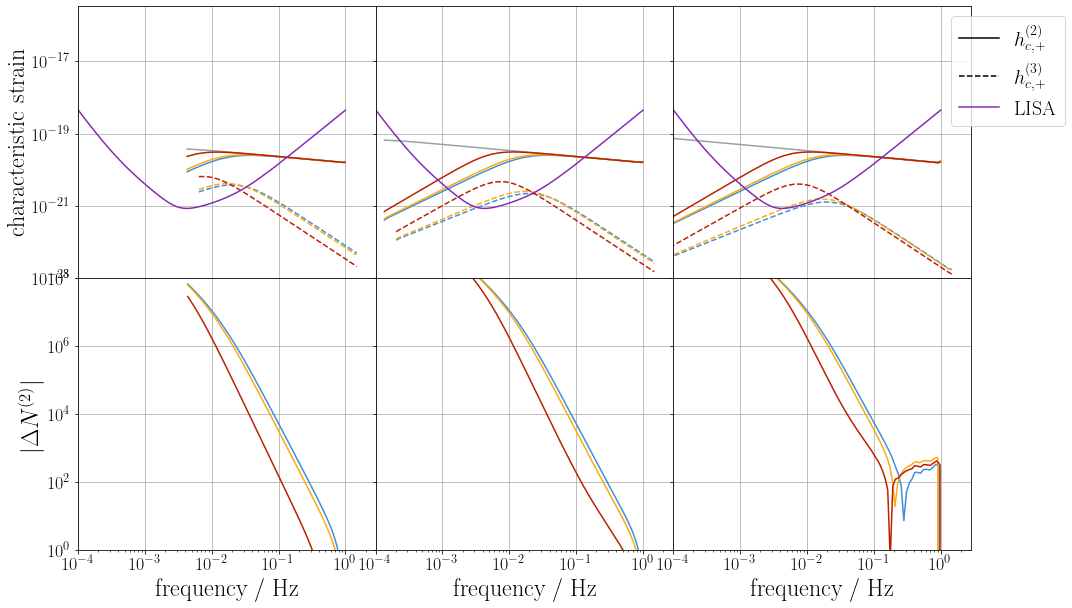

In [15]:
# Look at different initial separation
figT, axesT = plt.subplots(2, 3, figsize=(16,10), sharey='row')
figF, axesF = plt.subplots(2, 3, figsize=(16,10), sharex='all', sharey='row')

k0.e = 1e-1

k0.a = 1e2*hs.r_isco
axesT[0,0].set_title(r"$a_0=10^2r_{isco}$");# axesF[0,0].set_title(r"$a_0=10^2r_{isco}$")
compareModels(hs, spikes_and_labels, k0, ax_a=axesT[0,0], ax_ae=axesT[1,0], ax_h=axesF[0,0], ax_dN2=axesF[1,0])

k0.a = 1e3*hs.r_isco
axesT[0,1].set_title(r"$a_0=10^3r_{isco}$");# axesF[0,1].set_title(r"$a_0=10^3r_{isco}$")
compareModels(hs, spikes_and_labels, k0, ax_a=axesT[0,1], ax_ae=axesT[1,1], ax_h=axesF[0,1], ax_dN2=axesF[1,1], acc=1e-11)

k0.a = 1e4*hs.r_isco
axesT[0,2].set_title(r"$a_0=10^4r_{isco}$"); #axesF[0,2].set_title(r"$a_0=10^4r_{isco}$")
compareModels(hs, spikes_and_labels, k0, ax_a=axesT[0,2], ax_ae=axesT[1,2], ax_h=axesF[0,2], ax_dN2=axesF[1,2])

preparePlots( figF, axesF, f_min=1e-4, axes_ae = axesT[1,:], axes_a=axesT[0,:])
figT.subplots_adjust(wspace=0)
#figT.savefig("plots/evolution_a0.pdf", bbox_inches="tight"); figF.savefig("plots/gwSignal_a0.pdf", bbox_inches="tight")

Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 0.0480s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 16.3628s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 17.0556s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 15.3994s real t

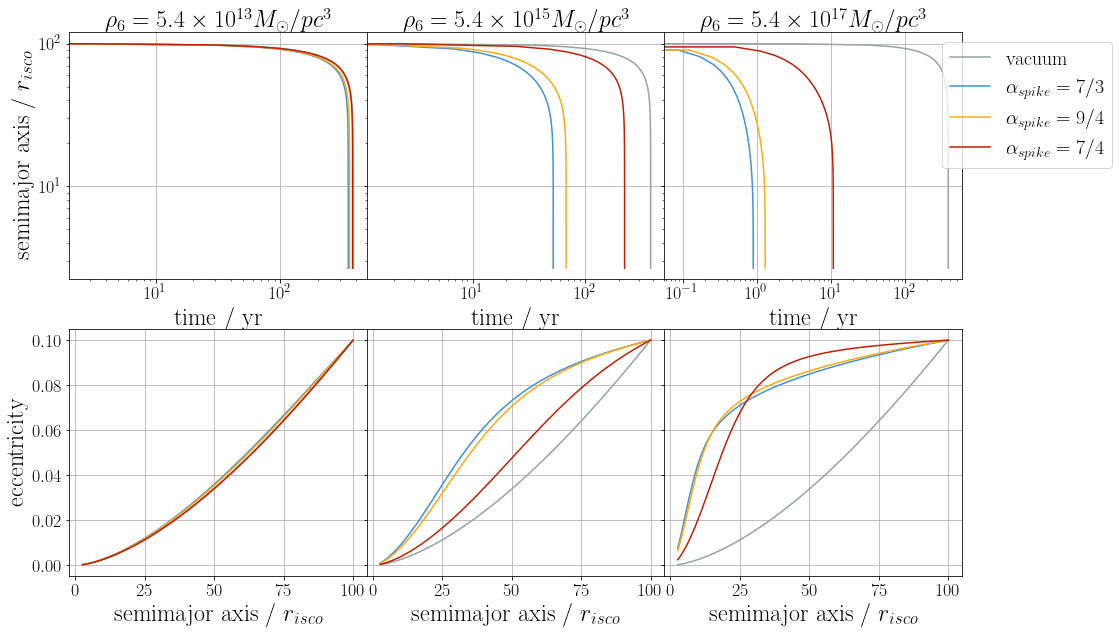

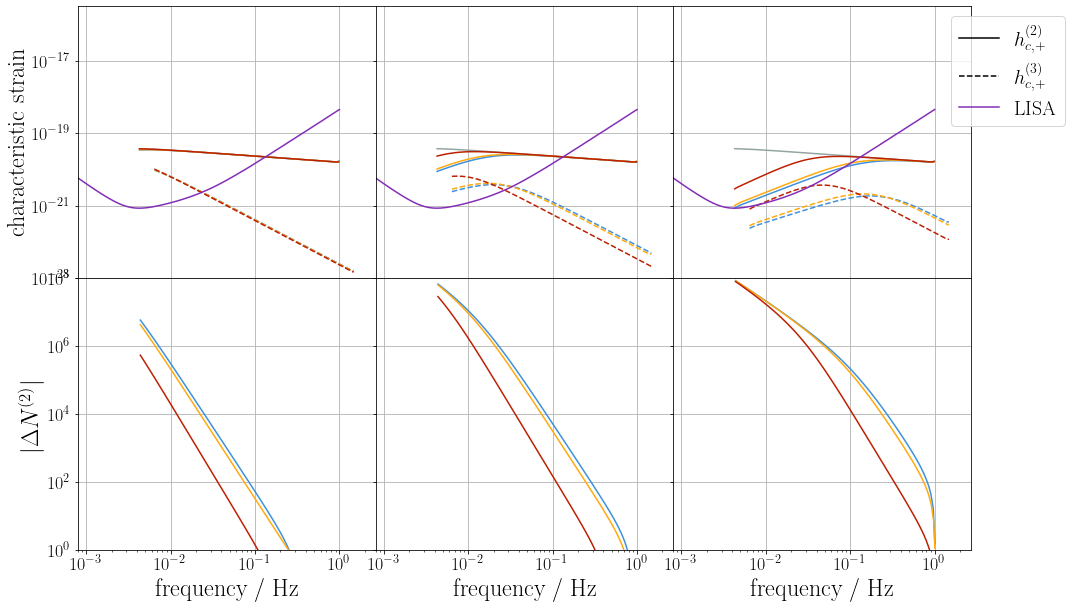

In [16]:
# Look at different Dark Matter Densities
figT, axesT = plt.subplots(2, 3, figsize=(16,10), sharey='row')
figF, axesF = plt.subplots(2, 3, figsize=(16,10), sharex='all', sharey='row')

k0.a = 100 * hs.r_isco
k0.e = 0.1

rho6 = 5.448e13 * c.solar_mass_to_pc  # in 1/pc^2 
spikes_and_labels_1 = [(halo.Spike.FromRho6(rho6, m1, alpha), label) for alpha,label in alphas]
axesT[0,0].set_title(r"$\rho_6=" + plot_utils.latex_float(rho6/c.solar_mass_to_pc) + "M_\odot/pc^3$")
compareModels(hs, spikes_and_labels_1, k0, ax_a=axesT[0,0], ax_ae=axesT[1,0], ax_h=axesF[0,0], ax_dN2=axesF[1,0])

rho6 = 5.448e15 * c.solar_mass_to_pc  # in 1/pc^2 
spikes_and_labels_2 = [(halo.Spike.FromRho6(rho6, m1, alpha), label) for alpha,label in alphas]
axesT[0,1].set_title(r"$\rho_6=" + plot_utils.latex_float(rho6/c.solar_mass_to_pc) + "M_\odot/pc^3$")
compareModels(hs, spikes_and_labels_2, k0, ax_a=axesT[0,1], ax_ae=axesT[1,1], ax_h=axesF[0,1], ax_dN2=axesF[1,1])

rho6 = 5.448e17 * c.solar_mass_to_pc  # in 1/pc^2 
spikes_and_labels_3 = [(halo.Spike.FromRho6(rho6, m1, alpha), label) for alpha,label in alphas]
axesT[0,2].set_title(r"$\rho_6=" + plot_utils.latex_float(rho6/c.solar_mass_to_pc) + "M_\odot/pc^3$")
compareModels(hs, spikes_and_labels_3, k0, ax_a=axesT[0,2], ax_ae=axesT[1,2], ax_h=axesF[0,2], ax_dN2=axesF[1,2])

preparePlots( figF, axesF, axes_ae = axesT[1,:], axes_a=axesT[0,:])
figT.subplots_adjust(wspace=0)
#figT.savefig("plots/evolution_rho6.pdf", bbox_inches="tight"); figF.savefig("plots/gwSignal_rho6.pdf", bbox_inches="tight")

Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 0.0450s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 12.4085s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 12.9127s real time
Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.1  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 15.0252s real t

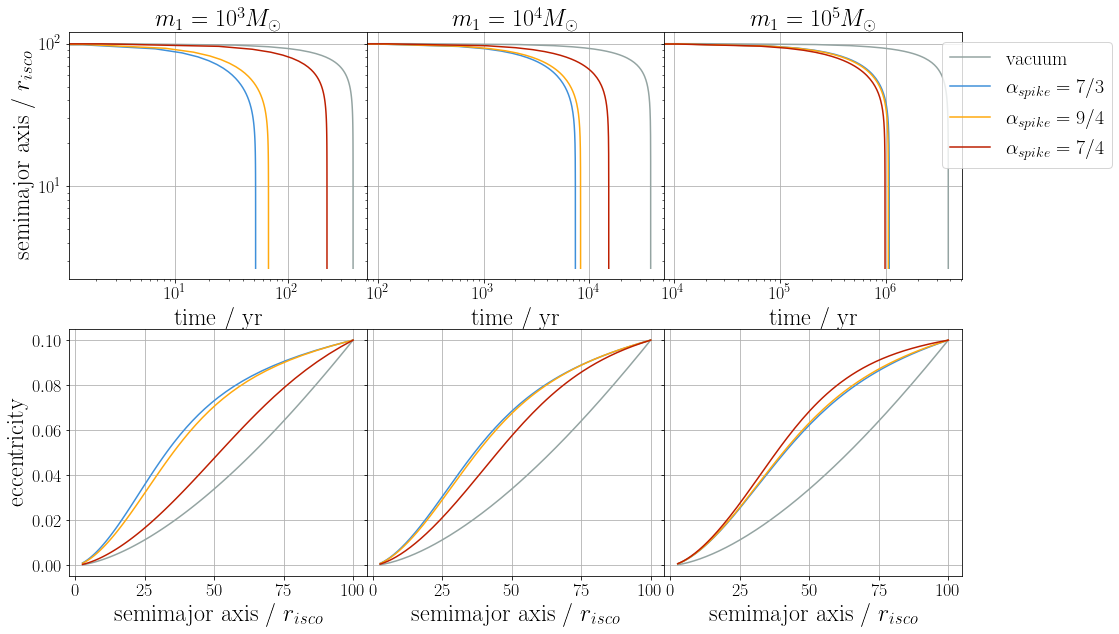

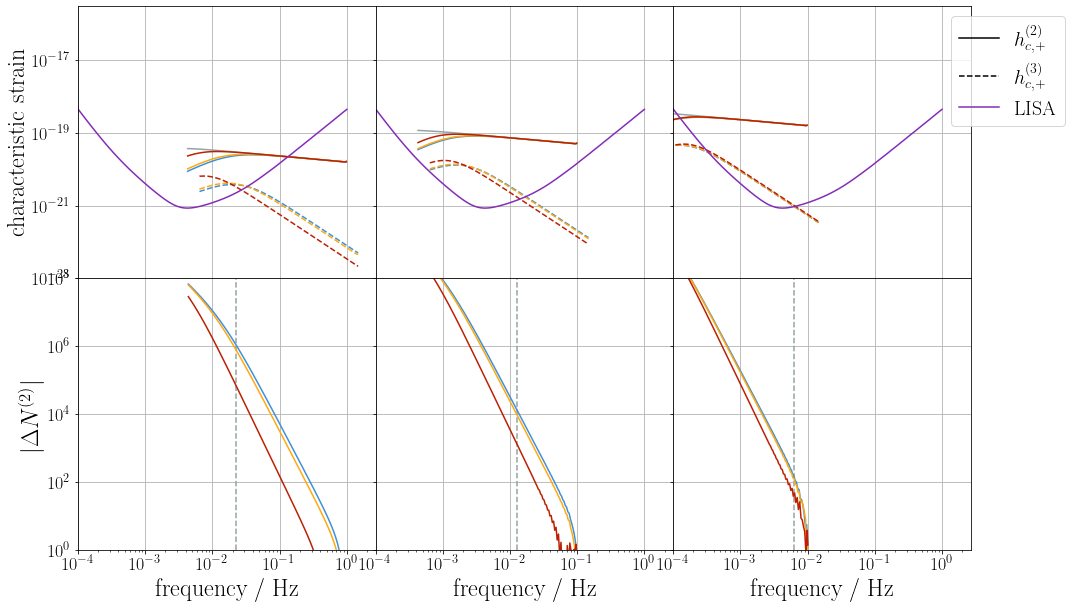

In [17]:
# Look at different m1
figT, axesT = plt.subplots(2, 3, figsize=(16,10), sharey='row')
figF, axesF = plt.subplots(2, 3, figsize=(16,10), sharex='all', sharey='row')

rho6 = 5.448e15 * c.solar_mass_to_pc  # in 1/pc^2
e0 = 0.1
# 1
m1 = 1e3 * c.solar_mass_to_pc
hs_1 = ms.HostSystem(m1, D_l=D)
spikes_and_labels_1 = [(halo.Spike.FromRho6(rho6, m1, alpha), label) for alpha,label in alphas]
a0 = 1e2*hs_1.r_isco
k0_1 = kepler.KeplerOrbit(hs_1, m2, a0, e0)
axesT[0,0].set_title(r"$m_1 = 10^3 M_{\odot}$"); #axesF[0,0].set_title(r"$m_1 = 10^3 M_{\odot}$")
compareModels(hs_1, spikes_and_labels_1, k0_1, ax_a=axesT[0,0], ax_ae=axesT[1,0], ax_h=axesF[0,0], ax_dN2=axesF[1,0], fgw5year_line=True)

# 2
m1 = 1e4 * c.solar_mass_to_pc
hs_2 = ms.HostSystem(m1, D_l=D)
spikes_and_labels_2 = [(halo.Spike.FromRho6(rho6, m1, alpha), label) for alpha,label in alphas]
a0 = 1e2*hs_2.r_isco
k0_2 = kepler.KeplerOrbit(hs_2, m2, a0, e0)
axesT[0,1].set_title(r"$m_1 = 10^4 M_{\odot}$"); #axesF[0,1].set_title(r"$m_1 = 10^4 M_{\odot}$")
compareModels(hs_2, spikes_and_labels_2, k0_2, ax_a=axesT[0,1], ax_ae=axesT[1,1], ax_h=axesF[0,1], ax_dN2=axesF[1,1], acc=1e-11, fgw5year_line=True)

# 3
m1 = 1e5 * c.solar_mass_to_pc
hs_3 = ms.HostSystem(m1, D_l=D)
spikes_and_labels_3 = [(halo.Spike.FromRho6(rho6, m1, alpha), label) for alpha,label in alphas]
a0 = 1e2*hs_3.r_isco
k0_3 = kepler.KeplerOrbit(hs_3, m2, a0, e0)
axesT[0,2].set_title(r"$m_1 = 10^5 M_{\odot}$"); #axesF[0,2].set_title(r"$m_1 = 10^5 M_{\odot}$")
compareModels(hs_3, spikes_and_labels_3, k0_3, ax_a=axesT[0,2], ax_ae=axesT[1,2], ax_h=axesF[0,2], ax_dN2=axesF[1,2], acc=1e-11, fgw5year_line=True)

preparePlots(figF, axesF, f_min=1e-4, axes_ae = axesT[1,:], axes_a=axesT[0,:])
figT.subplots_adjust(wspace=0)
#figT.savefig("plots/evolution_m1.pdf", bbox_inches="tight"); figF.savefig("plots/gwSignal_m1.pdf", bbox_inches="tight")